In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

In [4]:
datos = pd.read_csv("datos_juntos.csv",usecols=range(1,8))

In [4]:
datos

,glaciar,ndgi,ndsi,ndsii,ndvi,nwi,dem
0,0,0.025163,-0.172305,-0.367554,0.389118,-0.681484,2062.0
1,0,0.027103,-0.178530,-0.395024,0.417656,-0.693781,2083.0
2,0,0.026979,-0.187584,-0.406421,0.428699,-0.699194,2107.0
3,0,0.021329,-0.196939,-0.401945,0.419676,-0.698608,2115.0
4,0,0.022098,-0.198519,-0.398587,0.417011,-0.697651,2129.0
...,...,...,...,...,...,...,...
3164520,0,0.051658,-0.213988,-0.440083,0.480810,-0.714421,558.0
3164521,0,0.042838,-0.216777,-0.388143,0.423932,-0.701830,548.0
3164522,0,0.030515,-0.231196,-0.376501,0.402393,-0.699508,546.0
3164523,0,0.010088,-0.262020,-0.332850,0.341791,-0.701202,545.0


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164525 entries, 0 to 3164524
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   glaciar  int64  
 1   ndgi     float64
 2   ndsi     float64
 3   ndsii    float64
 4   ndvi     float64
 5   nwi      float64
 6   dem      float64
dtypes: float64(6), int64(1)
memory usage: 169.0 MB


## Selección de variables con Variance Threshold Feature Selection

In [13]:

selector = VarianceThreshold(threshold=0.25)

selector.fit(datos[['ndgi','ndsi','ndsii','ndvi','nwi','dem']])

print(selector.get_support())
datos[['ndgi','ndsi','ndsii','ndvi','nwi','dem']].columns[selector.get_support()]

[False False False False False  True]


Index(['dem'], dtype='object')

## Tiene sentido que diga que la variable DEM sea la mejor para predicción del modelo, dado que es muy significativo saber si hay un glaciar o no dependiendo de la altura a la que esté.

# En el siguiente código se van a cambiar los glaciares que estén a menos de 3400 DEM.

In [7]:
datos

,glaciar,ndgi,ndsi,ndsii,ndvi,nwi,dem
0,0,0.025163,-0.172305,-0.367554,0.389118,-0.681484,2062.0
1,0,0.027103,-0.178530,-0.395024,0.417656,-0.693781,2083.0
2,0,0.026979,-0.187584,-0.406421,0.428699,-0.699194,2107.0
3,0,0.021329,-0.196939,-0.401945,0.419676,-0.698608,2115.0
4,0,0.022098,-0.198519,-0.398587,0.417011,-0.697651,2129.0
...,...,...,...,...,...,...,...
3164520,0,0.051658,-0.213988,-0.440083,0.480810,-0.714421,558.0
3164521,0,0.042838,-0.216777,-0.388143,0.423932,-0.701830,548.0
3164522,0,0.030515,-0.231196,-0.376501,0.402393,-0.699508,546.0
3164523,0,0.010088,-0.262020,-0.332850,0.341791,-0.701202,545.0


In [8]:
indices_glaciar = datos[datos['glaciar']==1].index

datos_glaciar = datos.iloc[indices_glaciar]

indices_glaciar_final = datos_glaciar[datos_glaciar['dem']<3400].index

In [9]:
A = datos.loc[indices_glaciar_final]
A

,glaciar,ndgi,ndsi,ndsii,ndvi,nwi,dem
401152,1,-0.007301,0.252263,-0.011211,0.003910,-0.340384,3382.0
403423,1,-0.004927,0.212265,-0.006858,0.001931,-0.357603,3325.0
403427,1,-0.006975,0.221439,-0.006359,-0.000616,-0.356809,3394.0
405698,1,-0.002959,0.218888,-0.000656,-0.002303,-0.354871,3336.0
1383205,1,-0.003726,0.207810,-0.015197,0.011472,-0.369494,3337.0
1385479,1,-0.007313,0.207414,-0.022295,0.014985,-0.370956,3311.0
1385480,1,-0.003935,0.207113,-0.014835,0.010901,-0.370373,3333.0
1437800,1,-0.006458,0.237768,-0.013388,0.006931,-0.352488,2868.0
1440075,1,-0.010044,0.260452,-0.018626,0.008583,-0.336840,2828.0
1440076,1,-0.009624,0.250904,-0.019373,0.009751,-0.338527,2833.0


In [10]:
A.replace(to_replace= 1,value=0,inplace=True)

In [11]:
datos.loc[indices_glaciar_final] = A

In [12]:
datos.loc[indices_glaciar_final]

,glaciar,ndgi,ndsi,ndsii,ndvi,nwi,dem
401152,0,-0.007301,0.252263,-0.011211,0.003910,-0.340384,3382.0
403423,0,-0.004927,0.212265,-0.006858,0.001931,-0.357603,3325.0
403427,0,-0.006975,0.221439,-0.006359,-0.000616,-0.356809,3394.0
405698,0,-0.002959,0.218888,-0.000656,-0.002303,-0.354871,3336.0
1383205,0,-0.003726,0.207810,-0.015197,0.011472,-0.369494,3337.0
1385479,0,-0.007313,0.207414,-0.022295,0.014985,-0.370956,3311.0
1385480,0,-0.003935,0.207113,-0.014835,0.010901,-0.370373,3333.0
1437800,0,-0.006458,0.237768,-0.013388,0.006931,-0.352488,2868.0
1440075,0,-0.010044,0.260452,-0.018626,0.008583,-0.336840,2828.0
1440076,0,-0.009624,0.250904,-0.019373,0.009751,-0.338527,2833.0


In [13]:
X=datos.drop(['glaciar'],axis=1)
y=datos['glaciar']

In [14]:
X.columns

Index(['ndgi', 'ndsi', 'ndsii', 'ndvi', 'nwi', 'dem'], dtype='object')

In [15]:
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,ndgi,ndsi,ndsii,ndvi,nwi,dem
0,1.193690,0.157242,-1.366253,1.375193,-0.446021,-0.835588
1,1.276774,0.085030,-1.624575,1.605427,-0.666020,-0.815339
2,1.271477,-0.020010,-1.731744,1.694524,-0.762850,-0.792197
3,1.029463,-0.128536,-1.689657,1.621726,-0.752360,-0.784483
4,1.062406,-0.146859,-1.658074,1.600229,-0.735250,-0.770983
...,...,...,...,...,...,...
3164520,2.328413,-0.326319,-2.048294,2.114944,-1.035254,-2.285832
3164521,1.950669,-0.358670,-1.559863,1.656060,-0.810008,-2.295475
3164522,1.422916,-0.525943,-1.450384,1.482289,-0.768466,-2.297403
3164523,0.548060,-0.883525,-1.039907,0.993363,-0.798776,-2.298368


# Gráfico de cuanto aporta a la varianza cada componente

In [ ]:
pca_sample = pca.transform(X_scaled)
pca = pd.DataFrame(pca_sample)
pca

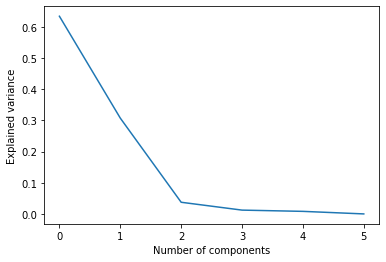

In [18]:


plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()



# Grafico de acumulación de varianza

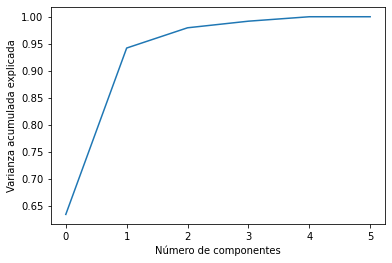

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.show()

In [20]:


def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)



        Explained Variance    ndgi    ndsi   ndsii    ndvi     nwi     dem
Dim. 1              0.6346 -0.4177  0.1657  0.5039 -0.5047  0.3112  0.4388
Dim. 2              0.9422 -0.8033 -0.5182  0.4970 -0.5671 -0.2596  0.6710
Dim. 3              0.9796 -1.0962 -0.6961  0.7475 -0.8296 -0.1737 -0.1913
Dim. 4              0.9918 -1.8519 -0.4155  0.2535 -0.5362 -0.0336 -0.2113
Dim. 5              1.0000 -1.9064  0.2125  0.4024 -0.6790 -0.7755 -0.3096
Dim. 6              1.0000 -2.0365  0.2146  1.0482  0.0733 -0.7795 -0.3077


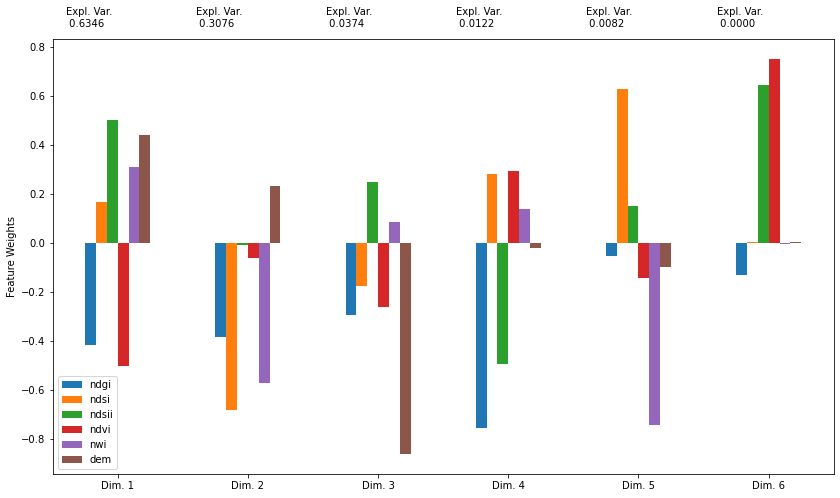

In [21]:
pca_results = pca_results(X_scaled, pca)
print(pca_results.cumsum())


## Es decir que solamente con las dos primeras componentes principales se explica la variabilidad del modelo en un 94 %

In [22]:
df = X.sample(n=30000)
df

,ndgi,ndsi,ndsii,ndvi,nwi,dem
2679406,0.011280,-0.189930,-0.238216,0.248828,-0.653262,1393.0
1296625,-0.004045,-0.234360,-0.264311,0.260545,-0.675901,2577.0
3121616,-0.007780,-0.145208,-0.256121,0.248837,-0.656305,2301.0
637571,0.014714,-0.182412,-0.355223,0.368014,-0.679094,3096.0
1097081,-0.020717,-0.258726,-0.145555,0.125216,-0.662475,3911.0
...,...,...,...,...,...,...
470427,-0.009139,-0.120189,-0.129577,0.120581,-0.608726,2782.0
206334,-0.018697,-0.275890,-0.241665,0.223981,-0.686305,1892.0
2098760,-0.032313,-0.135287,-0.083868,0.051695,-0.632810,4418.0
530551,0.014865,-0.105641,-0.263634,0.277411,-0.625569,2229.0


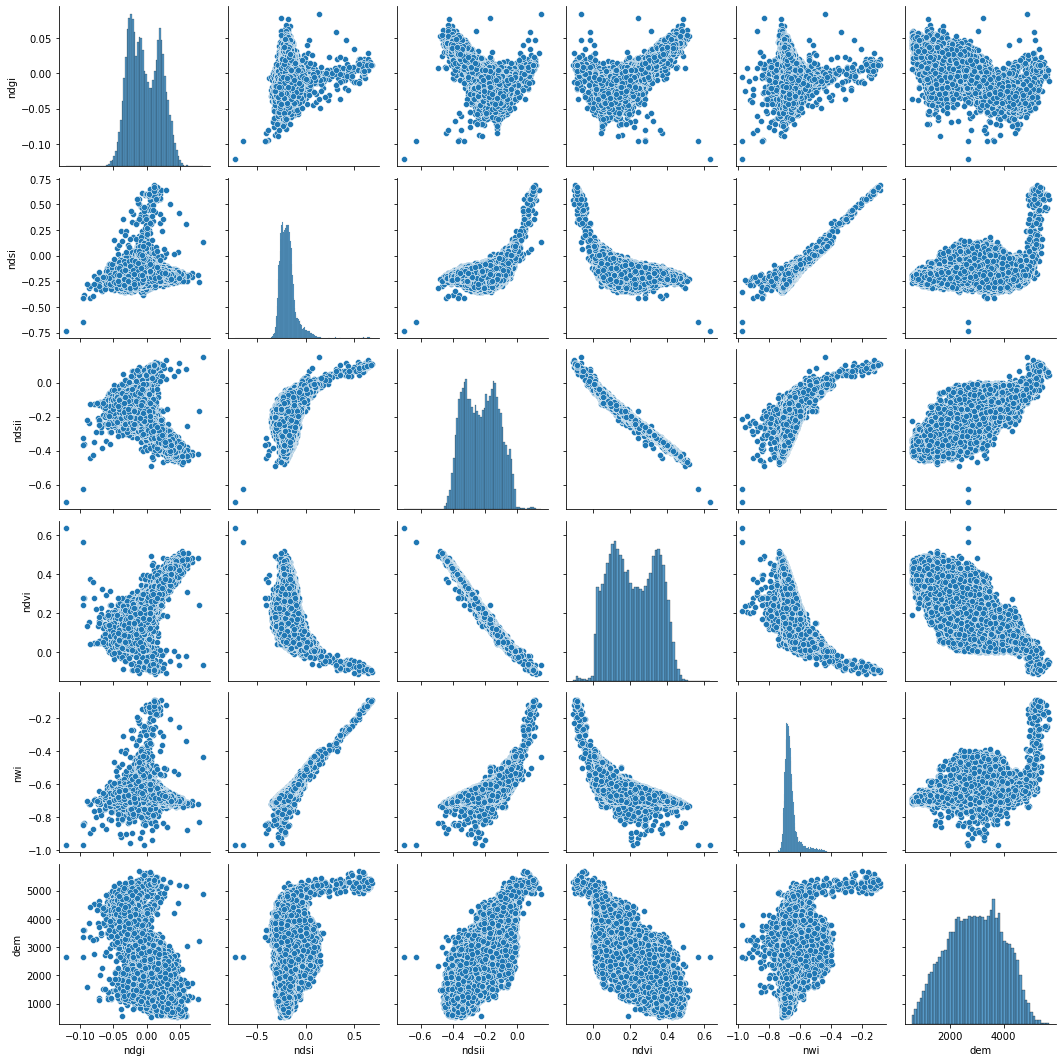

In [23]:
sns.pairplot(df)

In [46]:
pca_sample = pca.transform(X_scaled)
pca = pd.DataFrame(pca_sample)
pca

,0,1,2,3,4,5
0,-2.360585,-0.583570,-0.398693,0.174624,0.046848,-0.002553
1,-2.713209,-0.448528,-0.571696,0.255508,0.086846,-0.006220
2,-2.847354,-0.318827,-0.629968,0.295091,0.062048,-0.007506
3,-2.699642,-0.151238,-0.515865,0.406705,0.015209,-0.003870
4,-2.678427,-0.156917,-0.518872,0.356887,-0.004342,-0.004010
...,...,...,...,...,...,...
3164520,-4.451488,-0.732202,0.189753,-0.318199,0.053730,-0.035509
3164521,-3.755456,-0.669979,0.576638,-0.385970,0.026110,-0.017135
3164522,-3.407762,-0.366170,0.839265,-0.133271,-0.039681,-0.009038
3164523,-2.657801,0.260439,1.388541,0.077107,-0.063029,0.001407


In [134]:
X_pca = pca.iloc[:,0:2]
X_pca

,0,1
0,-2.360585,-0.583570
1,-2.713209,-0.448528
2,-2.847354,-0.318827
3,-2.699642,-0.151238
4,-2.678427,-0.156917
...,...,...
3164520,-4.451488,-0.732202
3164521,-3.755456,-0.669979
3164522,-3.407762,-0.366170
3164523,-2.657801,0.260439


# SIN PCA

## Regresión logística

In [162]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [163]:
model = LogisticRegression(fit_intercept=False)
model2=model.fit(X_train,y_train)


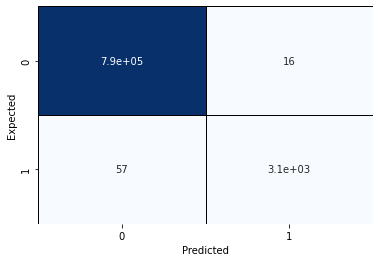

In [164]:
y_test_pred = model2.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_pred)
import seaborn as sns
sns.heatmap(matrix, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# VALIDACIÓN CRUZADA

In [165]:
model = LogisticRegression(fit_intercept=False)

scores = cross_val_score(model, X_train, y_train, cv=8,)
print('Puntajes de validación cruzada', scores)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Puntajes de validación cruzada [0.99991573 0.99993596 0.9999191  0.99993933 0.99989888 0.99991236
 0.99990225 0.99987865]


# Metricas

In [99]:
Score_train=accuracy_score(y_train,model2.predict(X_train))
print('Precision en entrenamiento:',Score_train)
Score_test=accuracy_score(y_test,model2.predict(X_test))
print('Precision en validacion:',Score_test)

Precision en entrenamiento: 0.9999266872363742
Precision en validacion: 0.9999228952943378


In [83]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9998735990562063, 0.9999018283074037, 0.9999241594337238)

In [98]:
y_train_pred = model2.predict(X_train)
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2364104
           1       0.99      0.99      0.99      9289

    accuracy                           1.00   2373393
   macro avg       1.00      0.99      1.00   2373393
weighted avg       1.00      1.00      1.00   2373393



## Podemos ver que es un modelo casi perfecto en el cual acierta en un 99% de las veces.

# CON PCA

In [148]:
X_train, X_test, y_train, y_test=train_test_split(X_pca,y)

In [153]:
model = LogisticRegression(fit_intercept=False,class_weight='balanced')
model2=model.fit(X_train,y_train)


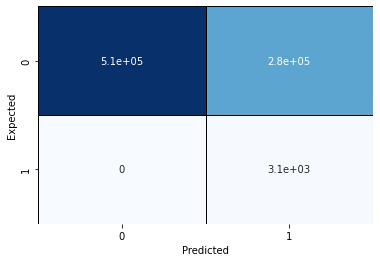

In [157]:
y_test_pred = model2.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_test_pred)
import seaborn as sns
sns.heatmap(matrix, annot=True, cbar=False, linecolor='black',linewidths=0.7,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Podemos ver que no está prediciendo en absoluto los glaciares (1)

# METRICAS

In [151]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Score_train=accuracy_score(y_train,model2.predict(X_train))
print('Precision en entrenamiento:',Score_train)
Score_test=accuracy_score(y_test,model2.predict(X_test))
print('Precision en validacion:',Score_test)
print(classification_report(y_test,model2.predict(X_test)))

Precision en entrenamiento: 0.6492797442311492
Precision en validacion: 0.6494744239899284
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    788054
           1       0.01      1.00      0.02      3078

    accuracy                           0.65    791132
   macro avg       0.51      0.82      0.40    791132
weighted avg       1.00      0.65      0.78    791132



## Se puede ver que tiene una precisión aún menor que el modelo sin hacerle nada

# CROSS VALIDATION

In [87]:
model = LogisticRegression(fit_intercept=False)

In [88]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print('Puntajes de validación cruzada', scores)

Puntajes de validación cruzada [0.64314486 0.64469537 0.64524311 0.64105351 0.64166445 0.64321077
 0.64106194 0.64415456 0.64167709 0.64071644]


In [89]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.6407164435680609, 0.6426622118221867, 0.6452431111485633)

# Reporte de clasificacion

In [94]:
y_train_pred = model2.predict(X_train)
report = classification_report(y_train, y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.64      0.78   2364141
           1       0.01      1.00      0.02      9252

    accuracy                           0.64   2373393
   macro avg       0.51      0.82      0.40   2373393
weighted avg       1.00      0.64      0.78   2373393



## Al aplicar PCA podemos ver que acierta en un 100% de las veces cuando no es glaciar pero no acierta nada cuando es glaciar.

# CLUSTERING

## Se utiliza una muestra aleatoria representativa para hacer el CLUSTERING (KMEANS) porque son demasiados datos.

In [104]:
scaler=StandardScaler()
ld=scaler.fit(df)
df_scaled=ld.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,ndgi,ndsi,ndsii,ndvi,nwi,dem
0,0.606321,-0.051685,-0.157084,0.250650,0.050611,-1.492857
1,-0.049510,-0.561482,-0.401679,0.344971,-0.348618,-0.348229
2,-0.209371,0.461470,-0.324912,0.250724,-0.003066,-0.615051
3,0.753295,0.034578,-1.253824,1.210065,-0.404921,0.153512
4,-0.762998,-0.841058,0.711455,-0.744387,-0.111865,0.941410
...,...,...,...,...,...,...
29995,-0.267507,0.748540,0.861217,-0.781692,0.835957,-0.150046
29996,-0.676547,-1.038010,-0.189413,0.050640,-0.532077,-1.010450
29997,-1.259258,0.575303,1.289659,-1.336201,0.411258,1.431550
29998,0.759720,0.915467,-0.395333,0.480741,0.538953,-0.684657


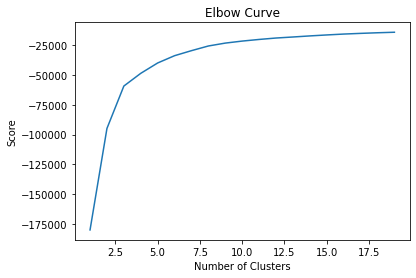

In [105]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Como se puede ver en la curva, tomamos un K= 3

In [167]:
kmeans = KMeans(n_clusters=3)

In [168]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [169]:
prediccion = kmeans.predict(X)

In [170]:
datos['cluster'] = prediccion

In [171]:
datos

,glaciar,ndgi,ndsi,ndsii,ndvi,nwi,dem,cluster
0,0,0.025163,-0.172305,-0.367554,0.389118,-0.681484,2062.0,0
1,0,0.027103,-0.178530,-0.395024,0.417656,-0.693781,2083.0,0
2,0,0.026979,-0.187584,-0.406421,0.428699,-0.699194,2107.0,0
3,0,0.021329,-0.196939,-0.401945,0.419676,-0.698608,2115.0,0
4,0,0.022098,-0.198519,-0.398587,0.417011,-0.697651,2129.0,0
...,...,...,...,...,...,...,...,...
3164520,0,0.051658,-0.213988,-0.440083,0.480810,-0.714421,558.0,0
3164521,0,0.042838,-0.216777,-0.388143,0.423932,-0.701830,548.0,0
3164522,0,0.030515,-0.231196,-0.376501,0.402393,-0.699508,546.0,0
3164523,0,0.010088,-0.262020,-0.332850,0.341791,-0.701202,545.0,0


In [173]:
datos.loc[:,'cluster'].value_counts()

2    1189570
1    1072527
0     902428
Name: cluster, dtype: int64

# MODELO CON CLUSTERS

In [125]:
X = datos.drop(['glaciar'],axis=1)
y = datos['glaciar']

In [126]:
X

,ndgi,ndsi,ndsii,ndvi,nwi,dem,cluster
0,0.025163,-0.172305,-0.367554,0.389118,-0.681484,2062.0,2
1,0.027103,-0.178530,-0.395024,0.417656,-0.693781,2083.0,2
2,0.026979,-0.187584,-0.406421,0.428699,-0.699194,2107.0,2
3,0.021329,-0.196939,-0.401945,0.419676,-0.698608,2115.0,2
4,0.022098,-0.198519,-0.398587,0.417011,-0.697651,2129.0,2
...,...,...,...,...,...,...,...
3164520,0.051658,-0.213988,-0.440083,0.480810,-0.714421,558.0,2
3164521,0.042838,-0.216777,-0.388143,0.423932,-0.701830,548.0,2
3164522,0.030515,-0.231196,-0.376501,0.402393,-0.699508,546.0,2
3164523,0.010088,-0.262020,-0.332850,0.341791,-0.701202,545.0,2


In [127]:
X_train, X_test, y_train, y_test=train_test_split(X,y)
model = LogisticRegression(fit_intercept=False)
model2=model.fit(X_train,y_train)


In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Score_train=accuracy_score(y_train,model2.predict(X_train))
print('Precision en entrenamiento:',Score_train)
Score_test=accuracy_score(y_test,model2.predict(X_test))
print('Precision en validacion:',Score_test)
print(classification_report(y_test,model2.predict(X_test)))


Precision en entrenamiento: 0.9999106764029387
Precision en validacion: 0.9999077271555189
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    788055
           1       0.99      0.98      0.99      3077

    accuracy                           1.00    791132
   macro avg       1.00      0.99      0.99    791132
weighted avg       1.00      1.00      1.00    791132



## Como era de esperarse, al agregar la columna de agrupación no iba a cambiar la predicción de los datos porque ya en realidad es casi perfecta.

In [174]:
df

,ndgi,ndsi,ndsii,ndvi,nwi,dem
2679406,0.011280,-0.189930,-0.238216,0.248828,-0.653262,1393.0
1296625,-0.004045,-0.234360,-0.264311,0.260545,-0.675901,2577.0
3121616,-0.007780,-0.145208,-0.256121,0.248837,-0.656305,2301.0
637571,0.014714,-0.182412,-0.355223,0.368014,-0.679094,3096.0
1097081,-0.020717,-0.258726,-0.145555,0.125216,-0.662475,3911.0
...,...,...,...,...,...,...
470427,-0.009139,-0.120189,-0.129577,0.120581,-0.608726,2782.0
206334,-0.018697,-0.275890,-0.241665,0.223981,-0.686305,1892.0
2098760,-0.032313,-0.135287,-0.083868,0.051695,-0.632810,4418.0
530551,0.014865,-0.105641,-0.263634,0.277411,-0.625569,2229.0


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [145]:
results=cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)
results

{'fit_time': array([8.61094975, 8.66748142, 8.51292491, 8.6489563 , 8.79676819]),
 'score_time': array([14.00019741, 14.063977  , 12.29179382, 13.7191031 , 12.74465299]),
 'test_score': array([-1.42203458e-05,  9.05152671e-01,  6.09074485e-01,  1.00000000e+00,
         1.00000000e+00])}